In [10]:
import matplotlib.pyplot as plt
%pylab inline

import numpy as np
from galpy.potential import MWPotential2014
import galpy 
import soda
from galpy import orbit

from astropy import units

Populating the interactive namespace from numpy and matplotlib


In [172]:
disk_params = [6.8E10, 3., 0.28]
# It's not clear that the bulge of the MWPotential2014 is a Hernquist
bulge_params = [0.5E10, 0.6]
host_model = ['NFW', 0.8E12, 245, 15.3]
t, pos, vel = soda.leapfrog.integrate_mw(4,  [10, 0, 0], [0, 240, 0], host_model=host_model,
                                         dt=0.0005, ac=0)

In [173]:
from galpy.potential import NFWPotential
from astropy import units

In [174]:
soda.cosmotools.Dvir(0)
halo_pot = NFWPotential(mvir=0.8, conc=15.3, Om=0.27, overdens=359.29, H=69.999992)

In [175]:
R = 10
vR = 0
vT = -240
z = 0
vZ = 0


op= orbit.Orbit(vxvv=[R*units.kpc,vR*units.km/units.s,
                      vT*units.km/units.s,z*units.kpc,
                      vZ*units.km/units.s,0.0*units.deg])

ts= numpy.linspace(0, 4.,10000)*units.Gyr
op.integrate(ts,halo_pot)

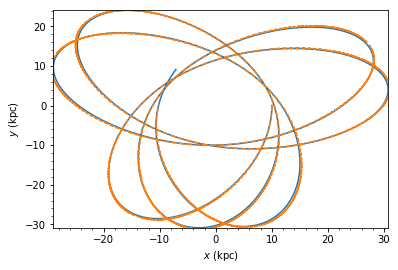

In [171]:
op.plot(d1='x',d2='y')
plot(pos[:,0], pos[:,1], ls='--')

## What the difference might be:

1. How Galpy derive the potential, or the integrator!